Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [0]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [0]:
df.shape

(1470, 35)

<Axes: >

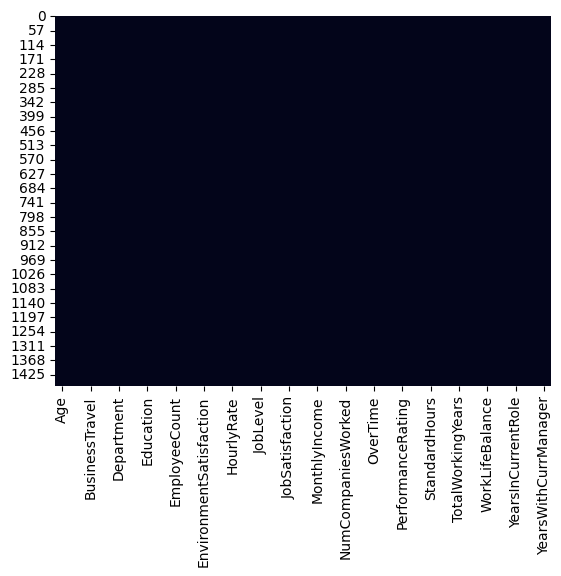

In [0]:
sns.heatmap(df.isnull(), cbar=False)

In [0]:
# Pre-processing
# Rename the target column for easier handling
df.drop(['BusinessTravel','Department','EducationField','EmployeeNumber','EmployeeCount','JobRole'], axis=1, inplace=True)

In [0]:
df['Attrition'].replace(['No', 'Yes'],  [0, 1], inplace=True)
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
df['MaritalStatus'].replace(['Single', 'Married','Divorced'],[0, 1, 3], inplace=True)
df['Over18'].replace(['N', 'Y'],  [0, 1], inplace=True)
df['OverTime'].replace(['No', 'Yes'],  [0, 1], inplace=True)


In [0]:
# convert 'Education' variable to categorical
df['Education'] = df['Education'].astype('category')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('category')
df['JobInvolvement'] = df['JobInvolvement'].astype('category')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('category')
df['PerformanceRating'] = df['PerformanceRating'].astype('category')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('category')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

<Axes: >

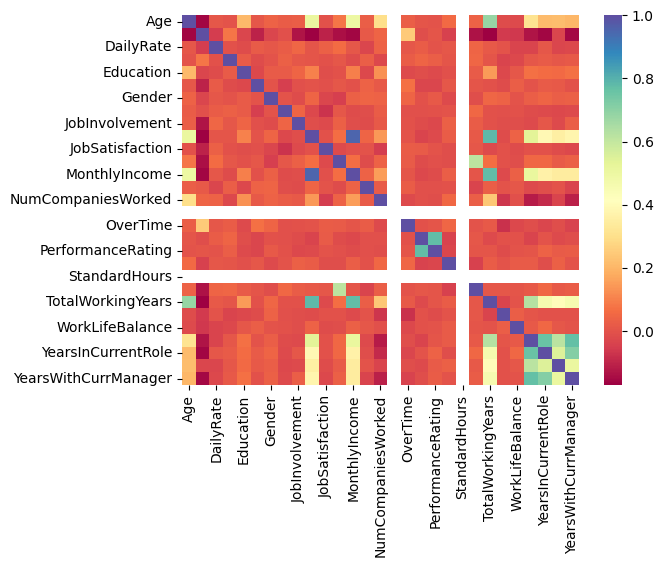

In [0]:
sns.heatmap(df.corr(), cmap="Spectral")

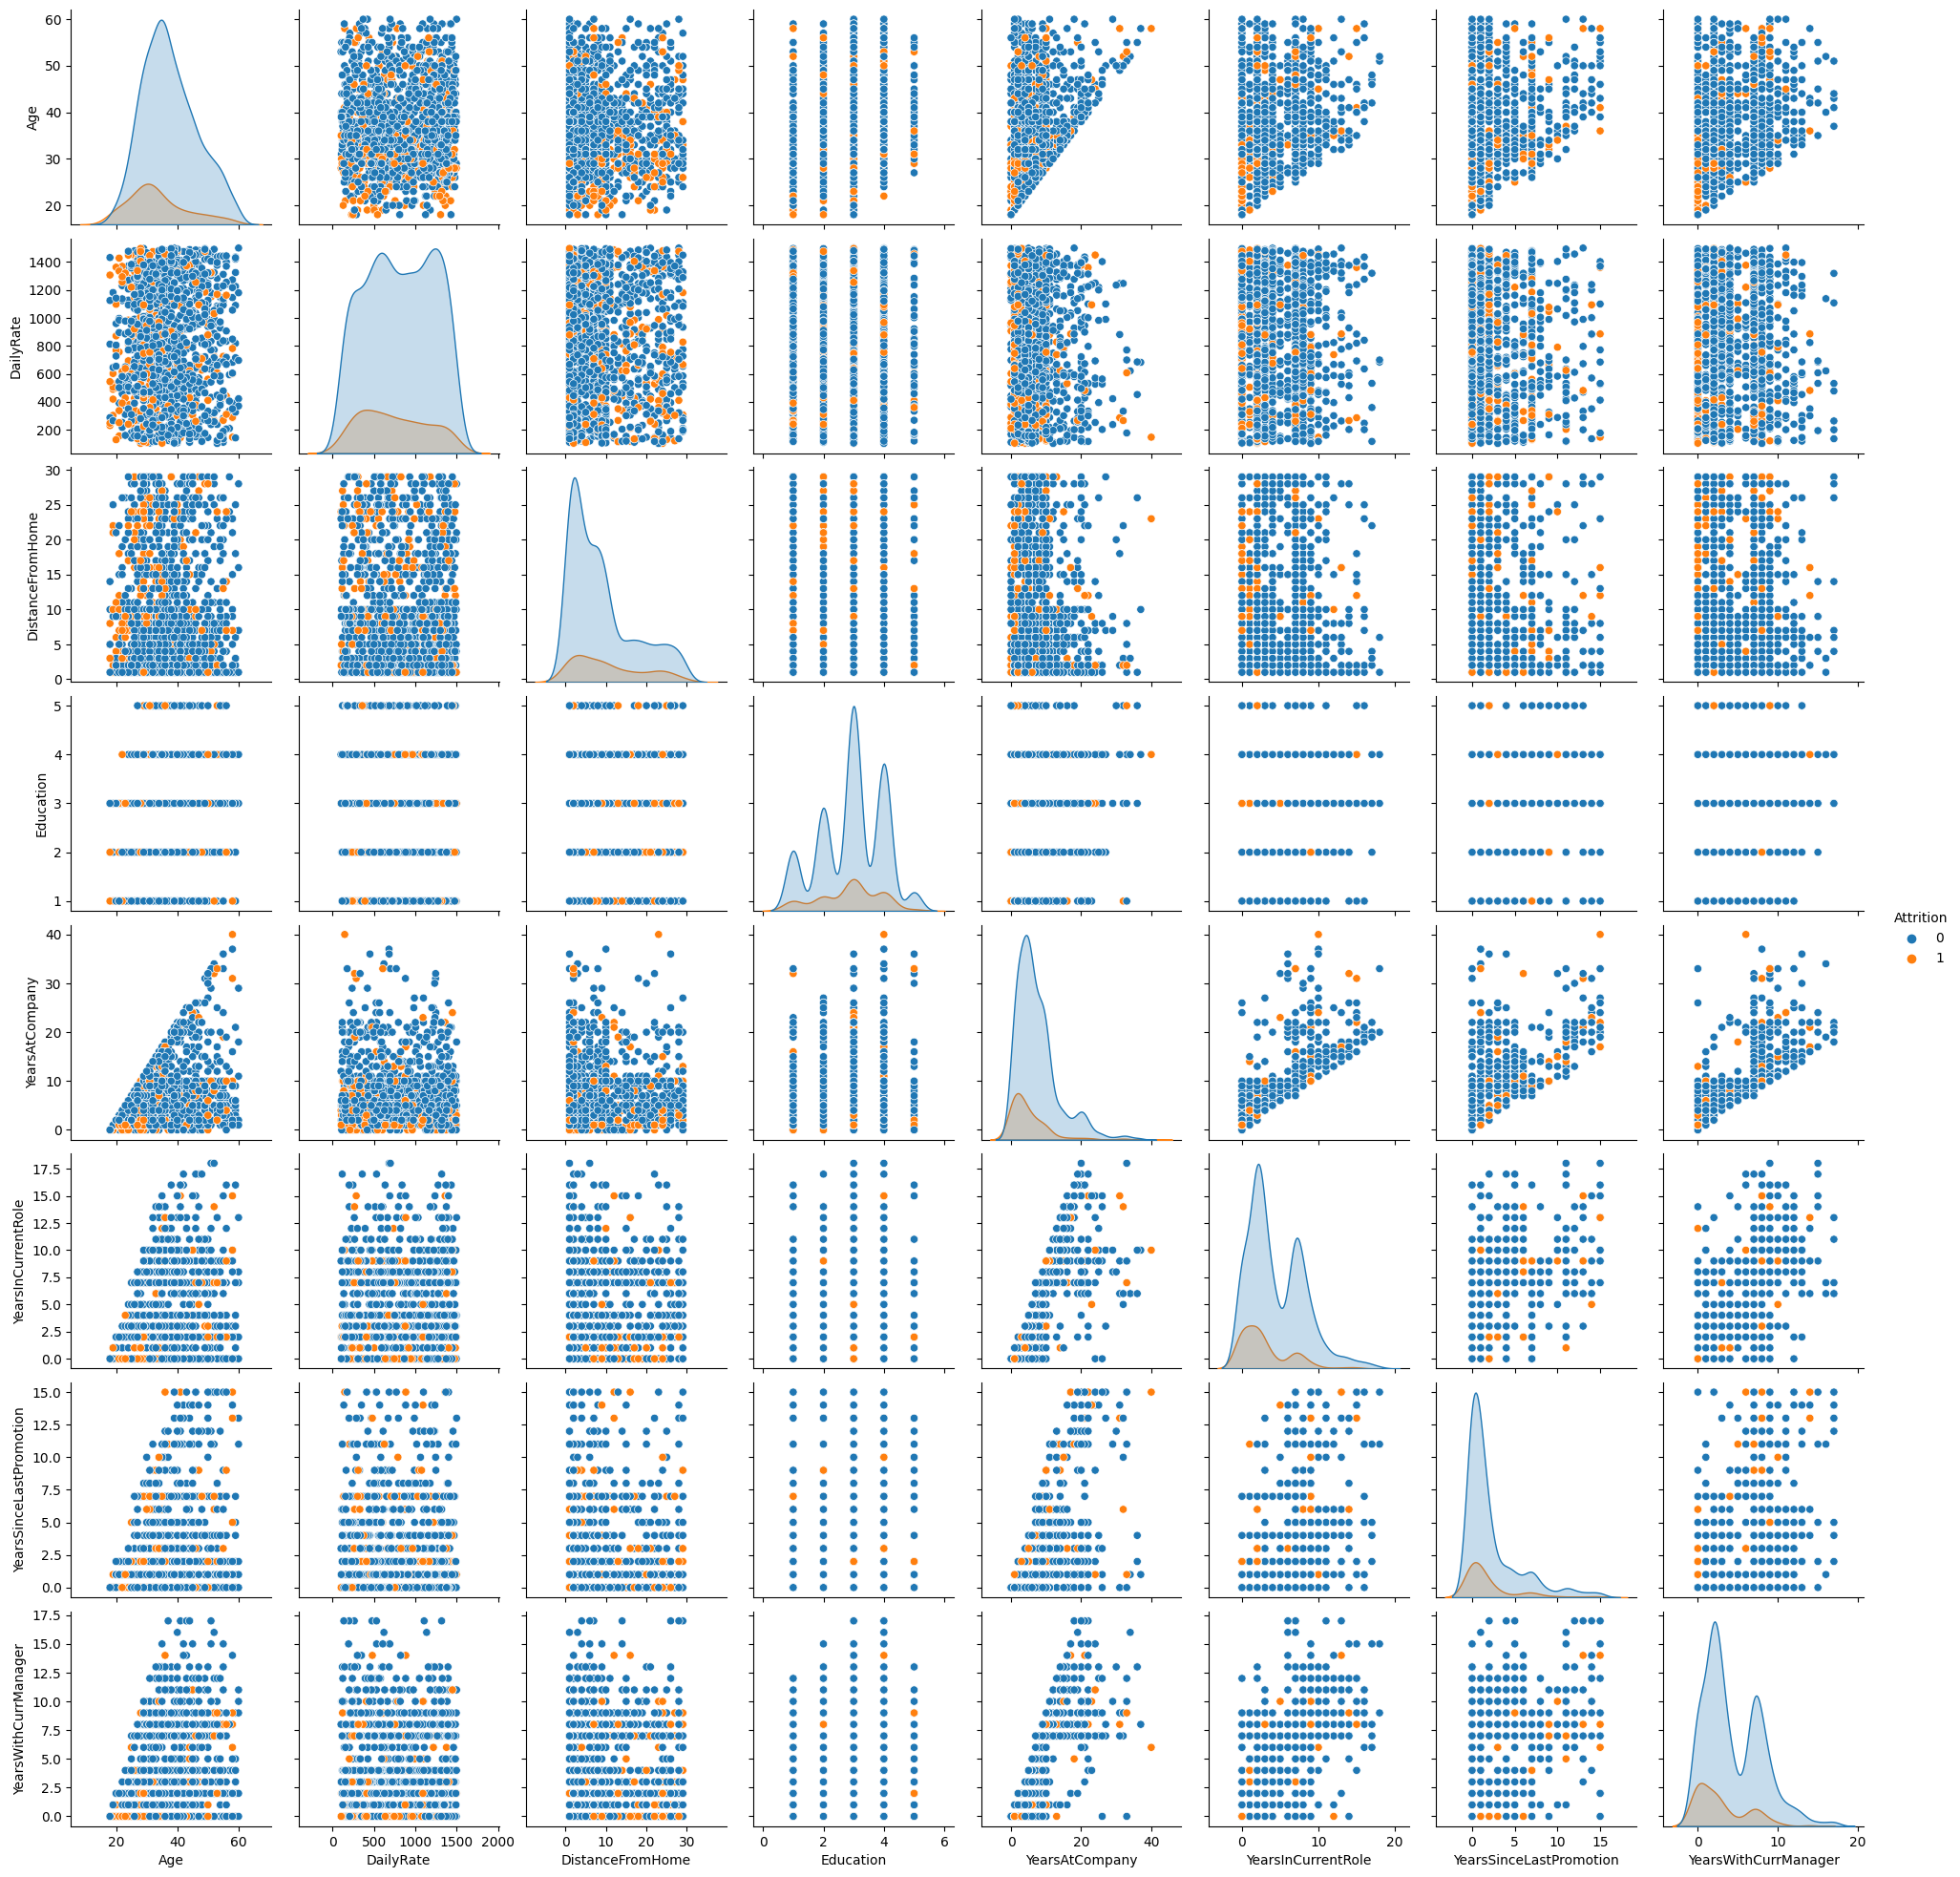

In [0]:
sns.pairplot(df[['Age','DailyRate','DistanceFromHome',	'Education','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']],hue='Attrition')

In [0]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,1,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,0,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,0,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,1,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,0,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,0,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,0,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,0,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,0,63,2,2,...,4,80,0,17,3,2,9,6,0,8


4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

In [0]:
 # Preparing features and labels
X = df.drop('Attrition',axis=1).values
y = df['Attrition'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [0]:
X_train.shape

(1029, 28)

In [0]:
# build the model
model = Sequential()

In [0]:

# add input layer
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

In [0]:
# add hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

In [0]:
# add hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))


In [0]:
# add output layer
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# set early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [0]:
# fit the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
33/33 [==============================] - 2s 17ms/step - loss: 0.6262 - accuracy: 0.6492 - val_loss: 0.5023 - val_accuracy: 0.8254
Epoch 2/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.5213 - accuracy: 0.8173 - val_loss: 0.4484 - val_accuracy: 0.8254
Epoch 3/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.4725 - accuracy: 0.8309 - val_loss: 0.4290 - val_accuracy: 0.8254
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.8358 - val_loss: 0.4128 - val_accuracy: 0.8254
Epoch 5/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.8387 - val_loss: 0.4058 - val_accuracy: 0.8254
Epoch 6/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.4306 - accuracy: 0.8426 - val_loss: 0.3979 - val_accuracy: 0.8254
Epoch 7/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.4383 - accuracy: 0.8426 - val_loss: 0.3948 - val_accuracy: 0.8254
Epoch

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

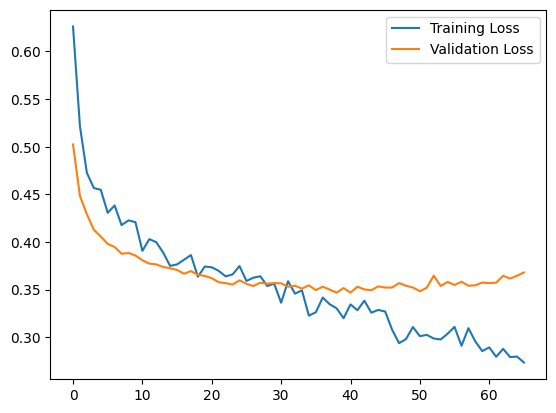

In [0]:
# plot training and validation losses versus epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [0]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

14/14 [==============================] - 0s 2ms/step


In [0]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       364
           1       0.66      0.38      0.48        77

    accuracy                           0.86       441
   macro avg       0.77      0.67      0.70       441
weighted avg       0.84      0.86      0.84       441



In [0]:
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

[[349  15]
 [ 48  29]]
14/14 [==============================] - 0s 2ms/step
ROC AUC:  0.8125089196517767
